In [ ]:
import numpy as np
import pandas as pd
import random as rd
from matplotlib import pyplot as plt

https://sragent.tistory.com/entry/k-means-%EC%86%8C%EA%B0%9C-k-means%EC%97%90%EC%84%9C-%EC%B4%88%EA%B8%B0-center%EB%A5%BC-%EC%9E%98-%EC%84%A0%EC%A0%95%ED%95%98%EB%8A%94-%EB%B0%A9%EB%B2%95

https://lovit.github.io/nlp/machine%20learning/2018/03/19/kmeans_initializer/

https://ko.wikipedia.org/wiki/K-%ED%8F%89%EA%B7%A0_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98

https://en.wikipedia.org/wiki/K-means_clustering

비지도 군집화 알고리즘 중 하나인 kmeans 알고리즘에 대한 내용입니다.

kmeans 알고리즘은 간단하게 설명해서 데이터가 속한 클러스터의 중심점과 데이터간 거리가 최소가 되도록 데이터들을 클러스터에 할당하는 알고리즘입니다.

knn 알고리즘과 헷갈리기 쉬운데 knn은 지도 학습이고 kmeans는 비지도 학습입니다.

In [97]:
data = pd.read_csv('tripadvisor_review.csv')
# 예제데이터는 tripadvisor_review 데이터를 사용합니다.

In [98]:
data.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


Attribute 1 : Unique user id

Attribute 2(Category1) : Average user feedback on art galleries

Attribute 3 : Average user feedback on dance clubs

Attribute 4 : Average user feedback on juice bars

Attribute 5 : Average user feedback on restaurants

Attribute 6 : Average user feedback on museums

Attribute 7 : Average user feedback on resorts

Attribute 8 : Average user feedback on parks/picnic spots

Attribute 9 : Average user feedback on beaches

Attribute 10 : Average user feedback on theaters

Attribute 11(Category10) : Average user feedback on religious institutions

In [84]:
X = data.values
X = data.iloc[:, [5, 9]].values
# Category5,9 값만 이용

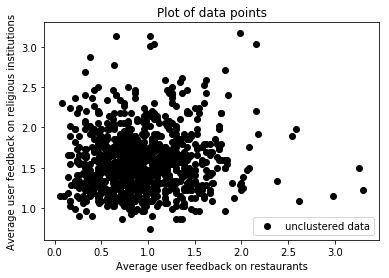

In [90]:
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Average user feedback on restaurants')
plt.ylabel('Average user feedback on religious institutions')
plt.legend()
plt.title('Plot of data points')
plt.show()
# 데이터 시각화

In [93]:
class Kmeans: #Kmeans라는 클래스를 정의합니다.
    def __init__(self,X,K): #Kmenas 클래스의 초기값(디폴트값)을 정해줍니다.
        self.X=X # X변수는 입력되는 데이터를 의미합니다.
        self.Output={} # 클러스터 id와 값을 저장하는 딕셔너리입니다.
        self.Centroids=np.array([]).reshape(self.X.shape[1],0) # 중심점을 의미합니다.
        self.K=K # K변수는 클러스터 개수를 의미합니다,
        self.m=self.X.shape[0] #Kmeans 클래스의 변수중 m은 입력된 X(데이터)의 row개수를 출력합니다.
        
    def kmeanspp(self,X,K):
        # kmenaspp은 임의로 정해지는 초기값을 정해주는 방식입니다.
        # k=3이라면 3개의 중심점이 필요한데 이떄 첫번쨰 초기값(C1)은 임의로 정하고 그 다음 초기값은
        # C1과 멀리 떨어져있는 점을 선택할 확률이 높을 수 있게 조절해줍니다.
        # 기존의 방법은 3개의 점 모두 랜덤으로 선택하는 방식입니다.
        # kmeanspp을 쓰는 이유는 kmeans알고리즘은 초기값이 매우 중요한데 초기값이 서로 가까운 점끼리 선택됐을떄 성능이 매우 안좋기 떄문입니다.
        i=rd.randint(0,X.shape[0]) # 첫번쨰 초기값은 랜덤으로 선택합니다.
        Centroid_temp=np.array([X[i]])
        for k in range(1,K):
            D=np.array([])
            for x in X:
                D=np.append(D,(np.sum((x-Centroid_temp)**2)))
            prob=D/np.sum(D)
            cummulative_prob=np.cumsum(prob)
            r=rd.random()
            i=0
            for j,p in enumerate(cummulative_prob):
                if r<p:
                    i=j
                    break
            Centroid_temp=np.append(Centroid_temp,[X[i]],axis=0)
        return Centroid_temp.T
        # 확률이 D(x)^2(유클리디안 제곱 거리)에 비례하는 편중 확률 분포를 사용하여 임의의 데이터를 선택한 후, n번째 중심으로 설정합니다.
        # 앞서 설명했드시 첫번째 초기값에서 먼 점을 선택할 수 있도록 확률을 조정해주는 과정입니다.
    
    def fit(self,n_iter):
        # n_iter는 반복횟수를 의미합니다.
        self.Centroids=self.kmeanspp(self.X,self.K)
        # 중심점은 kmeanspp의 결과입니다.
        
        for n in range(n_iter):
            EuclidianDistance=np.array([]).reshape(self.m,0)
            for k in range(self.K):
                tempDist=np.sum((self.X-self.Centroids[:,k])**2,axis=1) 
                #데이터와 각 중심점과의 거리의 합을 순서대로 구합니다.
                EuclidianDistance=np.c_[EuclidianDistance,tempDist]
            C=np.argmin(EuclidianDistance,axis=1)+1
            # 데이터와 각 중심점과의 거리에서 가장 거리가 짧은 중심점과 같은 군집으로 분류됩니다.
            Y={}
            for k in range(self.K):
                Y[k+1]=np.array([]).reshape(2,0)
            for i in range(self.m):
                Y[C[i]]=np.c_[Y[C[i]],self.X[i]]
                #C는 클러스터(군집) 인덱스이고 같은 군집으로 분류된 데이터를 추가합니다
        
            for k in range(self.K):
                Y[k+1]=Y[k+1].T
                
            for k in range(self.K):
                self.Centroids[:,k]=np.mean(Y[k+1],axis=0)
                # 중심점이 각 클러스터별 평균점으로 이동합니다.
            self.Output=Y
            # Output(=Y) = {클러스터 인덱스: 클러스터에 속해있는 점} 형태입니다.
        # 클러스터들의 평균점으로 중심점을 계속 이동해나갑니다. 중심점 = 평균점이 되면 더이상 중심점이 이동하지 않습니다.
            
    
    def predict(self):
        return self.Output,self.Centroids
    #self.predict를 실행하면 Output값과 Centroids의 전치값을 반환합니다.

In [94]:
kmeans=Kmeans(X,3)
# X데이터를 3개의 군집으로 분류합니다.
kmeans.fit(100)
# 100번 시행합니다.
Output,Centroids=kmeans.predict()

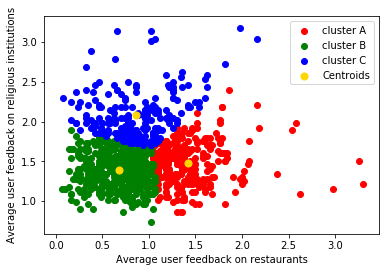

In [96]:
color=['r','g','b']
labelling=['cluster A','cluster B','cluster C']
for k in range(3):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labelling[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=50,c='gold',label='Centroids')
plt.xlabel('Average user feedback on restaurants')
plt.ylabel('Average user feedback on religious institutions')
plt.legend()
plt.show()